## 백색 잡음

시계열 분석을 구성하는 여러가지 기본 모형 중 가장 중요한 것이 바로 백색 잡음(white noise)이다.

백색 잡음  𝜖 은 확률 과정을 구성하는 모든 개별 확률 변수  𝜖𝑡 들이 서로 독립이고(independent) 동일한 확률 분포를 따르는(identically distributed) 확률 과정을 말한다. 이러한 가정을 약자로 i.i.d. 가정이라고 한다. 백색 잡음의 기반이 되는 확률 변수의 분포가 반드시 정규 분포일 필요는 없다.

$$\epsilon_t \sim \text{i.i.d.}$$

백색 잡음은 다음과 같은 특성을 만족한다.

+ 정상 과정(stictly stationary process)이다.

+ 시차(lag)가 0일 경우, 자기공분산은 확률 분포의 분산이 되고 시차가 0이 아닌 경우, 자기공분산은 0이다.

$$\gamma_l = \begin{cases} \text{Var}[\epsilon_t] & \;\; \text{ for } l = 0 \\  0 & \;\; \text{ for }  l \neq 0 \end{cases}$$

+ 시차(lag)가 0일 경우, 자기상관계수는 1이 되고 시차가 0이 아닌 경우, 자기상관계수는 0이다.

$$\rho_l = \begin{cases} 1 & \;\; \text{ for } l = 0 \\  0 & \;\; \text{ for }  l \neq 0 \end{cases}$$

## 가우시안 백색 잡음

확률 분포가 표준 가우시안 정규 분포인 백색 잡음을 가우시안 백색 잡음(Gaussina white noise)라고 한다.

$$\epsilon_t \sim \text{i.i.d. } N(\mu, \sigma^2)$$

가우시안 백색 잡음은 다음과 같이 시뮬레이션 할 수 있다.

In [1]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

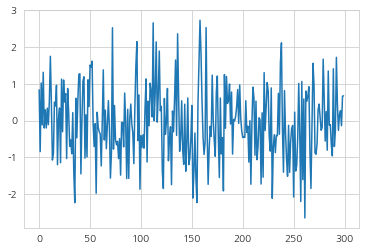

In [2]:
import scipy as sp

e = sp.stats.norm.rvs(size=300)

plt.plot(e)
plt.show()

## 비-가우시안 백색 잡음

앞서 밝혔지만 백색 잡음을 이루는 기반 확률 분포가 반드시 정규 분포일 필요는 없다. 예를 들어 가장 단순한 경우로서  {1,−1} 로 구성되고 1이 나올 확률  𝑝=0.5 인 베르누이 확률 과정도 백색 잡음이 된다.

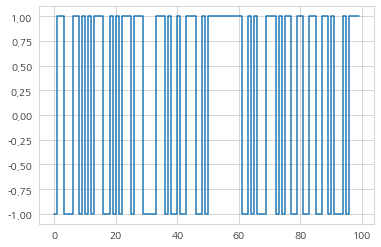

In [7]:
e = sp.stats.bernoulli.rvs(0.5, size=100) * 2 - 1
plt.step(np.arange(len(e)), e)
plt.ylim(-1.1, 1.1)
plt.show()

## 이산 시간 랜덤 워크

#### 이산 시간 랜덤 워크(discrete-time random walk)는 백색 잡음(white noise)을 누적한 확률 과정을 말한다.

수식으로 정의하면 다음과 같다.

\begin{eqnarray}
W_1 &=& \epsilon_1 \\
W_2 &=& \epsilon_1 + \epsilon_2 \\
\vdots &=& \vdots \\
W_t &=& \epsilon_1 + \epsilon_2 + \cdots + \epsilon_t \\
\end{eqnarray}

이산 시간 랜덤 워크는 다음과 같은 특성을 가진다.

+ 기댓값은 0
$$\text{E}[W_t] = 0$$

$$\text{E}[W_t] = \text{E} \left[ \sum_{i=1}^t \epsilon_t \right] = \sum_{i=1}^t \text{E} \left[ \epsilon_t \right] = 0$$

+ 분산은 시간에 비례

$$\text{Var}[W_t] = t\sigma_e^2$$

$$\text{Var}[W_t] = \text{E} \left[ \sum_{i=1}^t \epsilon_t^2 \right]  =  t\sigma_e^2$$

+ 자기공분산은 두 시간 중 빠른 시간에 비례

$$\gamma_{t,s} =  \gamma_{s, t} = t\sigma_e^2  \; \text{ if } t < s$$

$$\gamma_{t,s} = \text{Cov}[W_t, W_s] = \text{E} \left[ \sum_{i=1}^t \epsilon_t \sum_{i=1}^s \epsilon_s \right]  = \text{E} \left[ \sum_{i=1}^t \epsilon_t^2 \right]  =  t\sigma_e^2$$

+ 자기상관계수는 두 시간의 비율의 제곱근에 비례

$$\rho_{t,s} = \rho_{s,t} = \sqrt{\dfrac{t}{s}}  \; \text{ if } t < s$$

$$\rho_{t,s} = \dfrac{\text{Cov}[W_t, W_s]}{\sqrt{\text{Var}[W_t]\text{Var}[W_s]}} 
= \dfrac{t\sigma_e^2}{\sqrt{t\sigma_e^2 s\sigma_e^2}} = \sqrt{\dfrac{t}{s}}$$

#### 이산 시간 랜덤 워크는 백색 잡음에 대한 누적합(cumsum)으로 구현할 수 있다.

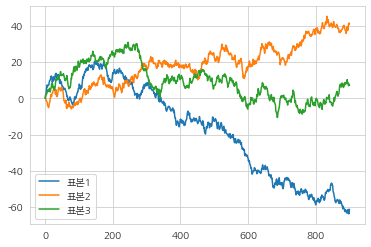

In [9]:
for i in range(3):
    np.random.seed(9*i)
    e = sp.stats.norm.rvs(size=900)  # 백색잡음
    W = np.insert(np.cumsum(e), 0, 0) #이산시간 랜덤워크
    plt.plot(W, label='표본{}'.format(i+1))
plt.legend()    
plt.show()